# BIG DATA ANALYSIS: Matplotlib 적용

### 탐색적 데이터 분석을 이용해 각각의 Feature들의 중요성 파악 및 새로운 Feature 생성
---

In [1]:
import sys
!{sys.executable} -m pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 확보 및 결측값 처리

In [3]:
df = pd.read_csv("data/train.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
아이디     891 non-null int64
생존      891 non-null int64
객실등급    891 non-null int64
이름      891 non-null object
성별      891 non-null object
나이      714 non-null float64
형제자매    891 non-null int64
부모      891 non-null int64
티켓번호    891 non-null object
요금      891 non-null float64
객실번호    204 non-null object
승선항     889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
import os

In [5]:
#한글 폰트를 사용할 시! 외우지 마시고 그때 그때 복사해서 사용!
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'data/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
plt.rcParams['font.size'] = 15.
plt.rcParams['xtick.labelsize'] = 10.
plt.rcParams['ytick.labelsize'] = 10.
plt.rcParams['axes.labelsize'] = 15.

## 1. 간단한 Box plot으로 Numeric 속성들에 대한 분포 확인

- count: 객체 수
- mean: 평균
- std: 표준편차
- min: 최소값 (이상치-outlier 포함)
- 25%: 전체 데이터를 순서대로 정렬 했을시, 25%지점 (1/4)에 해당하는 값
- 50%: 전체 데이터를 순서대로 정렬 했을시, 50%지점 (1/2)에 해당하는 값 (중위값)
- 70%: 전체 데이터를 순서대로 정렬 했을시, 70%지점 (3/4)에 해당하는 값
- max: 최대값 (이상치-outlier 포함)
<img src="data/boxplot.png"/>

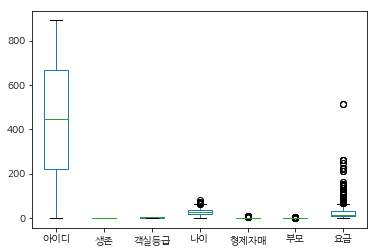

In [6]:
df.plot(kind='box')

### 1-1. 나이 속성에 대한 정보 확인하기

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 나이, dtype: float64


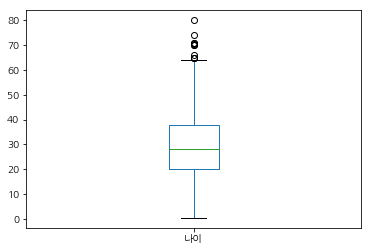

In [7]:
print(df['나이'].describe())
#pandas내에 정의된 plot 함수 활용
df['나이'].plot(kind='box')

### 1-2. 요금 속성에 대한 정보 확인하기

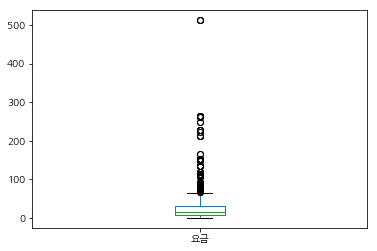

In [8]:
df['요금'].plot(kind='box')

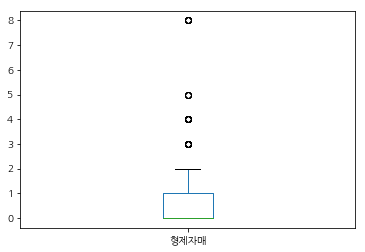

In [9]:
df["형제자매"].plot(kind='box')

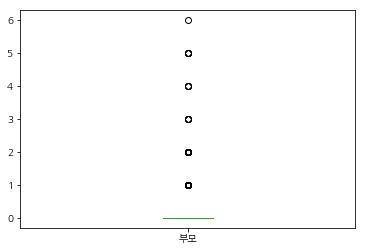

In [10]:
df["부모"].plot(kind='box')

In [11]:
#사실 범주형 데이터로 보는게 맞음!
df['부모'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: 부모, dtype: int64

## 2. Pandas Group by를 이용하여, 집단에 대한 통계량확인

### 2-1. 1-depth 분석

성별
female    314
male      577
Name: 성별, dtype: int64


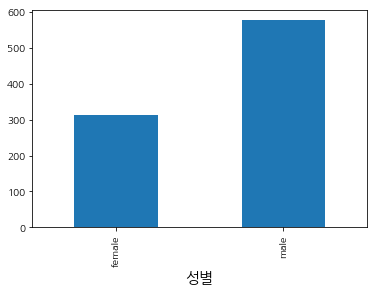

In [12]:
# 성별 따른 전체 데이터 분류
print(df.groupby('성별')['성별'].count())
df.groupby('성별')['성별'].count().plot(kind='bar')

생존
0    549
1    342
Name: 생존, dtype: int64


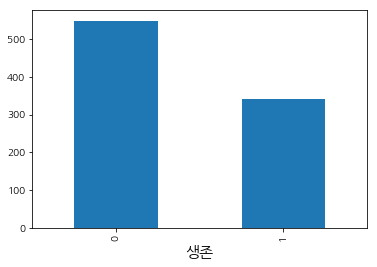

In [13]:
# 생존 여부에 따른 전체 데이터 분류
print(df.groupby('생존')['생존'].count())
df.groupby('생존')['생존'].count().plot(kind='bar')

객실등급
1    216
2    184
3    491
Name: 객실등급, dtype: int64


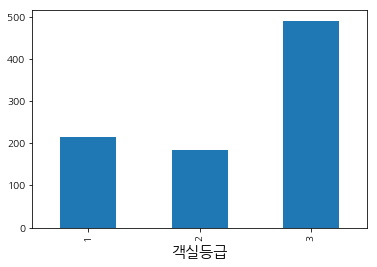

In [14]:
# 생존 여부에 따른 전체 데이터 분류
print(df.groupby('객실등급')['객실등급'].count())
df.groupby('객실등급')['객실등급'].count().plot(kind='bar')

### 2-2. 2-depth 분석

객실등급  성별    
1     female     94
      male      122
2     female     76
      male      108
3     female    144
      male      347
Name: 성별, dtype: int64
성별    female  male
객실등급              
1         94   122
2         76   108
3        144   347


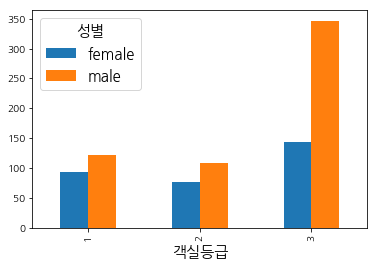

In [15]:
# 생존-성별에 따른 분류
print(df.groupby(['객실등급','성별'])['성별'].count())
print(df.groupby(['객실등급','성별'])['성별'].count().unstack())

df.groupby(['객실등급','성별'])['성별'].count().unstack().plot(kind='bar')
# df.groupby(['생존','성별'])['성별'].count().unstack().plot(kind='bar',stacked=True)

In [16]:
# 좀 더 깊게 들어가서, 남성, 여성, 어린이 항목으로 나눠 볼 수 있지 않을까?

In [17]:
def titanic_children(passenger):
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

df['사람'] = df[['나이','성별']].apply(titanic_children,axis=1)
df.head()

,아이디,생존,객실등급,이름,성별,나이,형제자매,부모,티켓번호,요금,객실번호,승선항,사람
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


객실등급  사람    
1     child       6
      female     91
      male      119
2     child      19
      female     66
      male       99
3     child      58
      female    114
      male      319
Name: 사람, dtype: int64
사람    child  female  male
객실등급                     
1         6      91   119
2        19      66    99
3        58     114   319


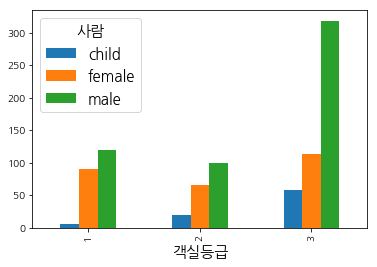

In [18]:
# 생존-성별에 따른 분류
print(df.groupby(['객실등급','사람'])['사람'].count())
print(df.groupby(['객실등급','사람'])['사람'].count().unstack())

df.groupby(['객실등급','사람'])['사람'].count().unstack().plot(kind='bar')
# df.groupby(['생존','성별'])['성별'].count().unstack().plot(kind='bar',stacked=True)

### 2-3. EDA를 통한 결측값 처리

나이 속성의 결측 값을 전체 나이의 평균 또는 남녀 나이의 평균으로 했는데, 조금 더 구체화 할 수 있지 않을까?

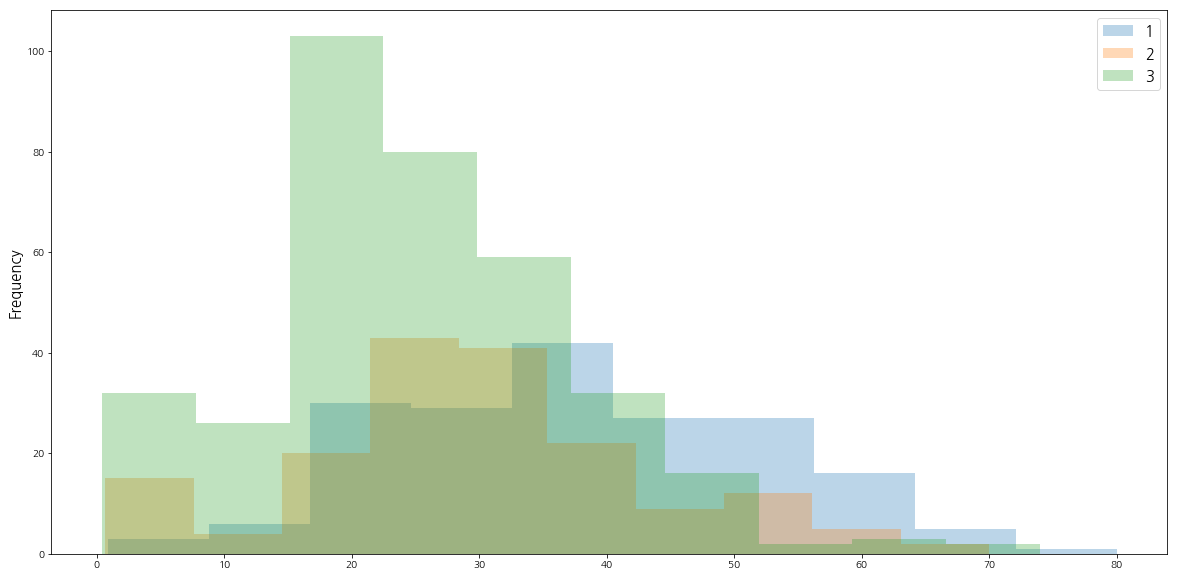

In [19]:
df.groupby(['객실등급'])['나이'].plot(kind='hist',bins=10,alpha=0.3,figsize=(20,10))
plt.legend()

## 3. 생존과 연관이 있는 속성 파악하기!

### 3-1. 나이와 생존이 연관이 있을까?

생존
0    30.626179
1    28.343690
Name: 나이, dtype: float64


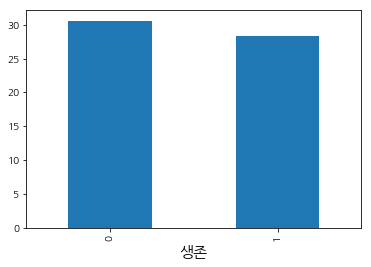

In [20]:
print(df.groupby(['생존'])['나이'].mean())
df.groupby(['생존'])['나이'].mean().plot(kind='bar')

### 3-2. 요금과 생존이 연관이 있을까?

생존
0    22.117887
1    48.395408
Name: 요금, dtype: float64


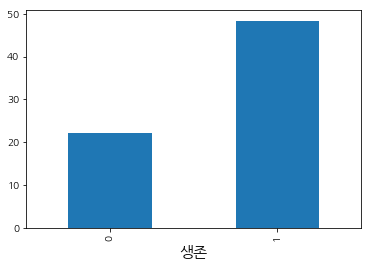

In [21]:

print(df.groupby(['생존'])['요금'].mean())
df.groupby(['생존'])['요금'].mean().plot(kind='bar')


### 3-3. 성별과 생존이 연관이 있을까?

생존  성별    
0   female     81
    male      468
1   female    233
    male      109
Name: 성별, dtype: int64
성별  female  male
생존              
0       81   468
1      233   109


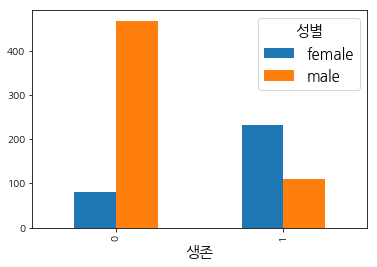

In [22]:
# 생존-성별에 따른 분류
print(df.groupby(['생존','성별'])['성별'].count())
print(df.groupby(['생존','성별'])['성별'].count().unstack())

df.groupby(['생존','성별'])['성별'].count().unstack().plot(kind='bar')
# df.groupby(['생존','성별'])['성별'].count().unstack().plot(kind='bar',stacked=True)

### 3-4. 객실 등급과 생존이 연관이 있을까?

객실등급    1   2    3
생존                
0      80  97  372
1     136  87  119


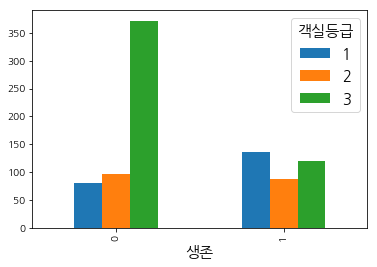

In [23]:

print(df.groupby(['생존','객실등급'])['객실등급'].count().unstack())

df.groupby(['생존','객실등급'])['객실등급'].count().unstack().plot(kind='bar')
# df.groupby(['생존','성별'])['성별'].count().unstack().plot(kind='bar',stacked=True)

### 3-5. 승선항과 생존이 연관이 있을까?

승선항   C   Q    S
생존              
0    75  47  427
1    93  30  217


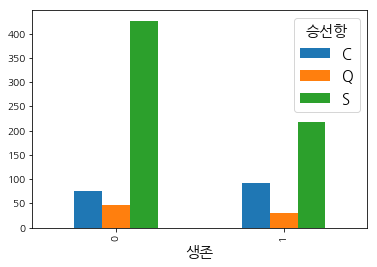

In [24]:

print(df.groupby(['생존','승선항'])['승선항'].count().unstack())

df.groupby(['생존','승선항'])['승선항'].count().unstack().plot(kind='bar')
# df.groupby(['생존','성별'])['성별'].count().unstack().plot(kind='bar',stacked=True)

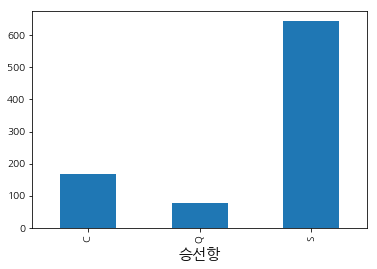

In [25]:
#그냥 S항에서 승선한 사람이 많을 뿐..
df.groupby('승선항')['승선항'].count().plot(kind='bar')